<a href="https://colab.research.google.com/github/emy217joseph/market-segmentation-on-EVs/blob/main/EVs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
#Importing Libraries
import re
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ElectricCarData_Clean.csv to ElectricCarData_Clean.csv


In [4]:
file_path = 'ElectricCarData_Clean.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0       450              161            940         Yes        AWD   
1       270              167            250         Yes        RWD   
2       400              181            620         Yes        AWD   
3       360              206            560         Yes        RWD   
4       170              168            190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C  

In [ ]:
df.shape #Checking shape of data
#Number of rows and columns

(103, 14)

In [ ]:
df.describe() #Checking statistics of data

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


from matplotlib import pyplot as plt
_df_0['AccelSec'].plot(kind='hist', bins=20, title='AccelSec')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TopSpeed_KmH'].plot(kind='hist', bins=20, title='TopSpeed_KmH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Range_Km'].plot(kind='hist', bins=20, title='Range_Km')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Efficiency_WhKm'].plot(kind='hist', bins=20, title='Efficiency_WhKm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='AccelSec', y='TopSpeed_KmH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='TopSpeed_KmH', y='Range_Km', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Range_Km', y='Efficiency_WhKm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Efficiency_WhKm', y='Seats', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['AccelSec'].plot(kind='line', figsize=(8, 4), title='AccelSec')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['TopSpeed_KmH'].plot(kind='line', figsize=(8, 4), title='TopSpeed_KmH')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Range_Km'].plot(kind='line', figsize=(8, 4), title='Range_Km')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Efficiency_WhKm'].plot(kind='line', figsize=(8, 4), title='Efficiency_WhKm')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Checking Data types
df.dtypes

,0
Brand,object
Model,object
AccelSec,float64
TopSpeed_KmH,int64
Range_Km,int64
Efficiency_WhKm,int64
FastCharge_KmH,object
RapidCharge,object
PowerTrain,object
PlugType,object


In [ ]:
#Checing for nulls
df.columns
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i,df[i].isnull().sum())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [ ]:
# Find the car with the fastest 0-100 km/h acceleration
fastest_car = df.loc[df['AccelSec'].idxmin()]

# Display the fastest car
print(f"The fastest EV from 0-100 km/h is the {fastest_car['Model']} by {fastest_car['Brand']} with a time of {fastest_car['AccelSec']} seconds.")

The fastest EV from 0-100 km/h is the Roadster  by Tesla  with a time of 2.1 seconds.


In [ ]:
# Find the car with the highest efficiency
most_efficient_car = df.loc[df['Efficiency_WhKm'].idxmax()]

# Display the most efficient car
print(f"The most efficient EV is the {most_efficient_car['Model']} by {most_efficient_car['Brand']} with an efficiency of {most_efficient_car['Efficiency_WhKm']} Wh/km.")

The most efficient EV is the EQV 300 Long by Mercedes  with an efficiency of 273 Wh/km.


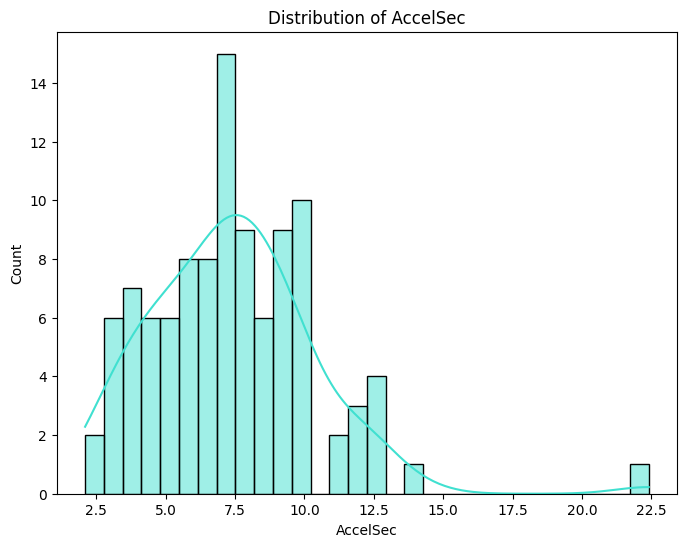

In [ ]:
# Create the histogram
plt.figure(figsize=(8, 6))
sb.histplot(df['AccelSec'], kde=True, bins=30, color='turquoise')

# Customize the plot
plt.xlabel("AccelSec")
plt.ylabel("Count")
plt.title("Distribution of AccelSec")

plt.show()

Correlation matrix:
                 Range_Km  TopSpeed_KmH  Efficiency_WhKm
Range_Km         1.000000      0.746662         0.313077
TopSpeed_KmH     0.746662      1.000000         0.355675
Efficiency_WhKm  0.313077      0.355675         1.000000


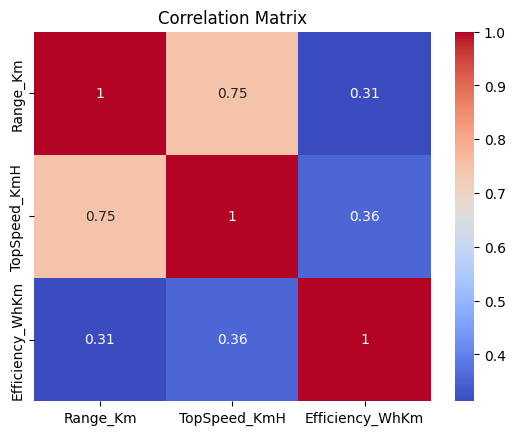

In [ ]:
# Calculate correlations
correlations = df[['Range_Km', 'TopSpeed_KmH', 'Efficiency_WhKm']].corr()

# Display correlation matrix
print("Correlation matrix:")
print(correlations)

# Plot correlation heatmap
sb.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Count the number of models for each manufacturer
manufacturer_counts = df['Brand'].value_counts()

# Display the manufacturer with the most number of vehicles
top_manufacturer = manufacturer_counts.idxmax()
top_count = manufacturer_counts.max()

print(f"The manufacturer with the most number of vehicles is {top_manufacturer} with {top_count} models.")

The manufacturer with the most number of vehicles is Tesla  with 13 models.


In [7]:
# Count the occurrences of each brand
brand_counts = df['Brand'].value_counts()

print(brand_counts)

Brand
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: count, dtype: int64


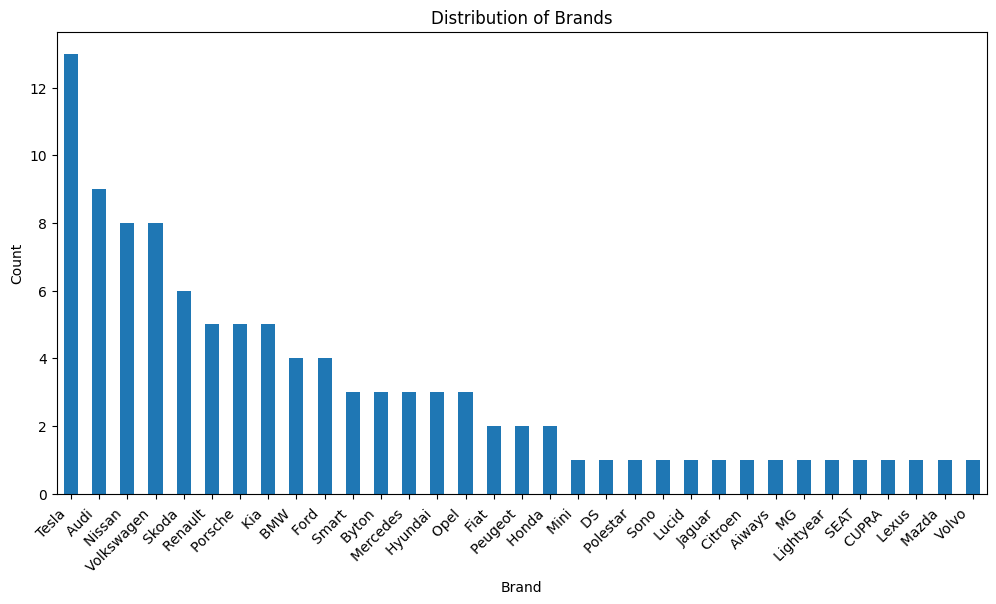

In [8]:
plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Brands')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import scipy as sp

In [15]:
df['FastCharge_KmH'].value_counts()[:30]

FastCharge_KmH
230    6
440    5
540    5
-      5
380    5
470    4
560    4
190    4
260    3
170    3
420    3
210    3
490    2
710    2
270    2
450    2
350    2
330    2
590    2
550    2
340    2
480    2
650    2
220    2
620    2
390    2
410    1
770    1
460    1
740    1
Name: count, dtype: int64

In [16]:
df.loc[df['FastCharge_KmH']=='-']

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
57,Renault,Twingo ZE,12.6,135,130,164,-,No,RWD,Type 2,Hatchback,A,4,24790
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,-,No,FWD,Type 2,SPV,N,5,38000
77,Smart,EQ forfour,12.7,130,95,176,-,No,RWD,Type 2,Hatchback,A,4,22030
82,Smart,EQ fortwo coupe,11.6,130,100,167,-,No,RWD,Type 2,Hatchback,A,2,21387
91,Smart,EQ fortwo cabrio,11.9,130,95,176,-,No,RWD,Type 2,Cabrio,A,2,24565


In [19]:
df.loc[df['FastCharge_KmH']=='230']

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
11,Nissan,Leaf,7.9,144,220,164,230,Yes,FWD,Type 2 CHAdeMO,Hatchback,C,5,29234
22,Skoda,Enyaq iV 50,10.0,160,290,179,230,Yes,RWD,Type 2 CCS,SUV,C,5,35000
32,Renault,Zoe ZE50 R110,11.4,135,315,165,230,Yes,FWD,Type 2 CCS,Hatchback,B,5,31184
38,Renault,Zoe ZE50 R135,9.5,140,310,168,230,Yes,FWD,Type 2 CCS,Hatchback,B,5,33133
60,Renault,Zoe ZE40 R110,11.4,135,255,161,230,Yes,FWD,Type 2 CCS,Hatchback,B,5,29234
75,Kia,e-Niro 39 kWh,9.8,155,235,167,230,Yes,FWD,Type 2 CCS,SUV,C,5,34400


Mean Squared Error: 1212.0757784223028
R^2 Score: -0.06228619805922975
              Coefficient
Range_Km        -0.004439
TopSpeed_KmH     0.225835


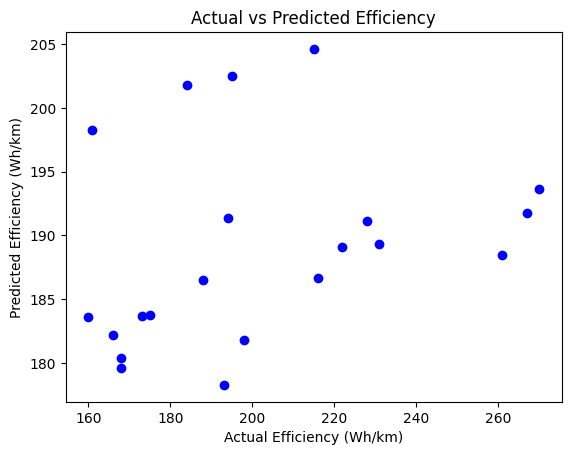

In [21]:
# Define the features (independent variables) and target (dependent variable)
X = df[['Range_Km', 'TopSpeed_KmH']]
y = df['Efficiency_WhKm']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plotting the results
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Efficiency (Wh/km)')
plt.ylabel('Predicted Efficiency (Wh/km)')
plt.title('Actual vs Predicted Efficiency')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor

Mean Squared Error (MSE): 1068.095021136756
Root Mean Squared Error (RMSE): 32.68172304418413
Mean Absolute Error (MAE): 21.928709750566895
R^2 Score: 0.06390126808223351


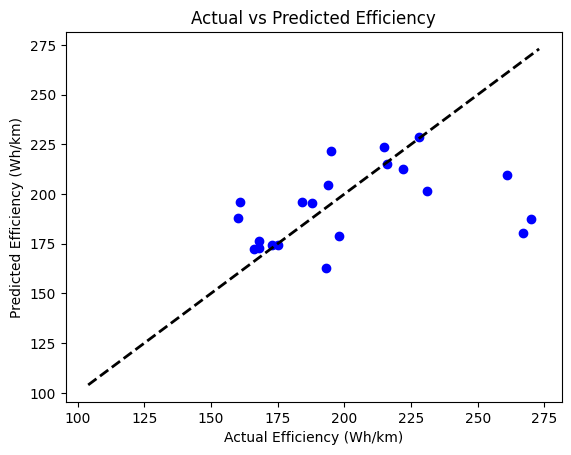

In [24]:
# Define the features (independent variables) and target (dependent variable)
X = df[['Range_Km', 'TopSpeed_KmH']]
y = df['Efficiency_WhKm']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error, root mean squared error, mean absolute error, and R^2 score
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

# Plotting the results
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Efficiency (Wh/km)')
plt.ylabel('Predicted Efficiency (Wh/km)')
plt.title('Actual vs Predicted Efficiency')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()